<h1>Cegpy</h1>
A Python package built to simplify the creation of Chain Event Graphs (CEGs) from datasets.

<h2>Basic Chain Event Graph Example</h2>

This first example builds a Chain Event Graph (CEG) from a discrete dataset showing results from a medical experiment.
The dataset used is symetrical, built from a rectangular dataset. These CEGs are known as <em>stratified</em> in the literature.

The Agglomerative Hierarchical Clustering (AHC) algorithm is used to maximise the log marginal likelihood score of the staged tree/CEG model to determine its stages. The package functions under a Bayesian framework and priors can be supplied to the AHC algorithm to override the default settings, see `5_ahc_customisation.ipynb`. 

<h3>Step 1: Import the dataset</h3>

The example 'medical.xlsx' dataset contains 4 catagorical variables; Classification, Group, Difficulty, Response.

Each individual is given a binary classification; 'Blast' or 'Non-blast'. Each group is rated on their experience level; 'Experienced', 'Inexperienced', or 'Novice'.
The classification task they are given has a difficulty rating of 'Easy' or 'Hard'. Finally, their response is shown; 'Blast' or 'Non-blast'.

In [1]:
from cegpy import StagedTree, ChainEventGraph
import pandas as pd

dataframe = pd.read_excel("medical.xlsx")
dataframe

,Classification,Group,Difficulty,Response
0,Blast,Experienced,Easy,Blast
1,Non-blast,Experienced,Easy,Non-blast
2,Non-blast,Experienced,Hard,Blast
3,Non-blast,Experienced,Hard,Non-blast
4,Blast,Experienced,Easy,Blast
...,...,...,...,...
10979,Blast,Novice,Easy,Non-blast
10980,Blast,Novice,Easy,Blast
10981,Non-blast,Novice,Easy,Blast
10982,Blast,Novice,Easy,Non-blast


In [2]:
# Descriptive statistics for the dataset 
dataframe.describe()

,Classification,Group,Difficulty,Response
count,10984,10984,10984,10984
unique,2,3,2,2
top,Non-blast,Novice,Easy,Blast
freq,5493,7389,5494,5863


<h3>Step 2: Transform dataset into a tree, and apply the AHC algorithm</h3>

The event tree description of the process can be obtained from the `StagedTree` class as shown below. 

A `StagedTree` is a coloured `EventTree`. 

The `EventTree` class is responsible for the conversion of the dataset into a tree.

If you are having problems with importing datasets, it is wise to debug the generation of the `EventTree`.  

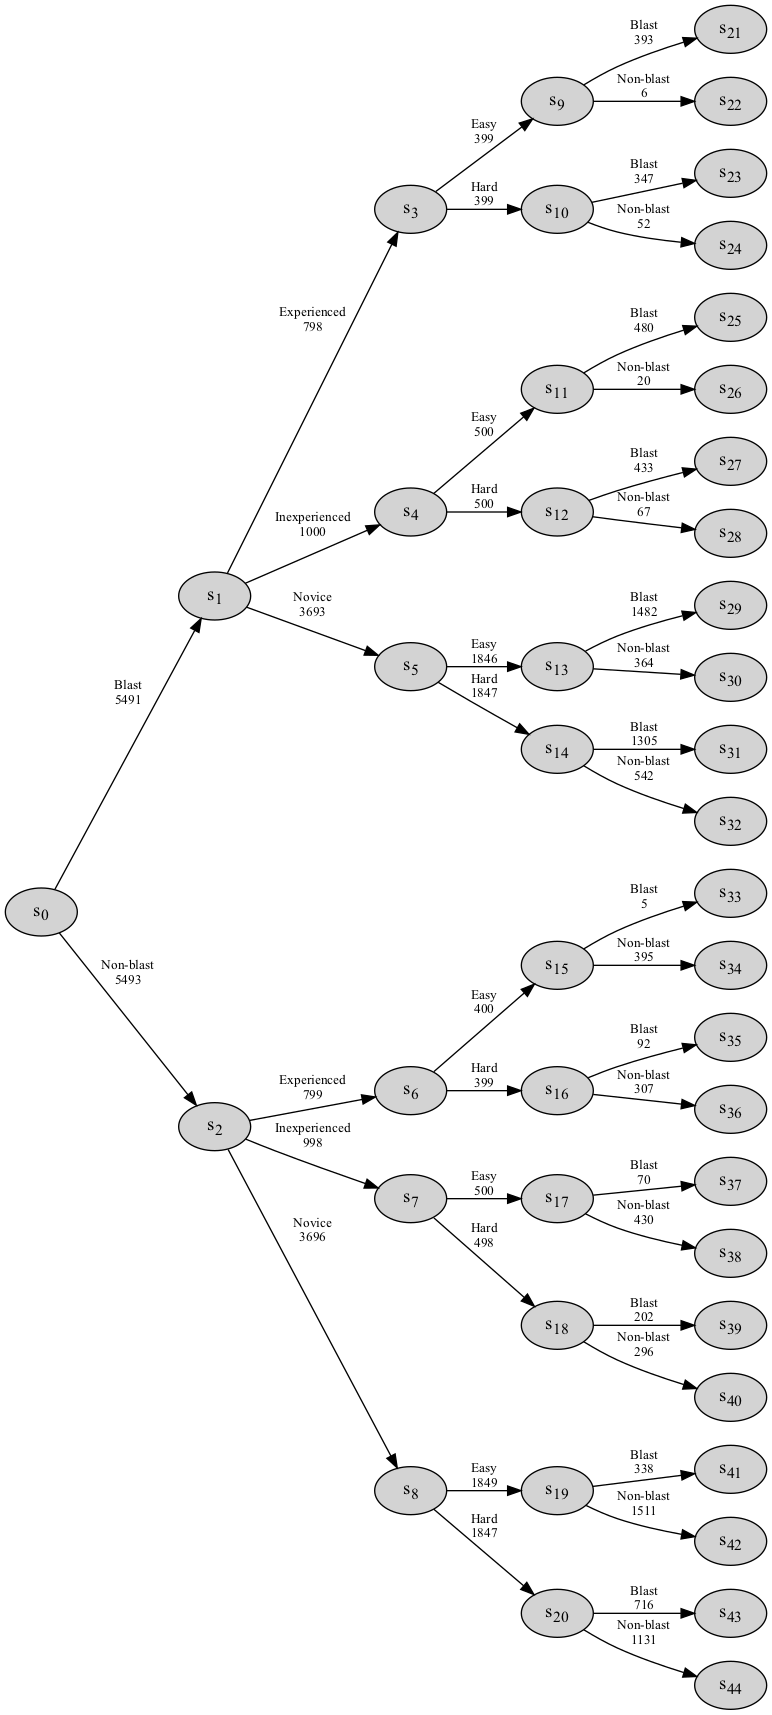

In [9]:
staged_tree = StagedTree(dataframe)
staged_tree.create_event_tree_figure()

'''Or equivalently, use the EventTree class as below'''

#from cegpy import EventTree

#med_event_tree = EventTree(dataframe)
#med_event_tree.create_figure()


AHC is executed on the event tree, and the nodes are assigned a colour if they are found to be in the same 'stage' as each other. Note that the `.calculate_AHC_transitions()` method is only available from the `StagedTree` class and not the `EventTree` class.

Effectively, nodes in the same stage share the same parameter set; in other words, the immediate future of these nodes is identical. Note that singleton stages are not coloured in the staged tree and its corresponding CEG to prevent visual cluttering. 

When the CEG is created, equivalent nodes (precisely, those whose complete future is identical) in a stage will be combined to compress the graph.

In [11]:
staged_tree.calculate_AHC_transitions()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cegpy/trees/_staged.py:421: RuntimeWarning: invalid value encountered in double_scalars
  self._calculate_lg_of_sum(new_prior)


{'Merged Situations': [('s1', 's2'),
  ('s18', 's20'),
  ('s10', 's12'),
  ('s4', 's3', 's8', 's6', 's5', 's7'),
  ('s9', 's11'),
  ('s16', 's19', 's17'),
  ('s0',),
  ('s13',),
  ('s14',),
  ('s15',)],
 'Loglikelihood': -30091.353114865367}

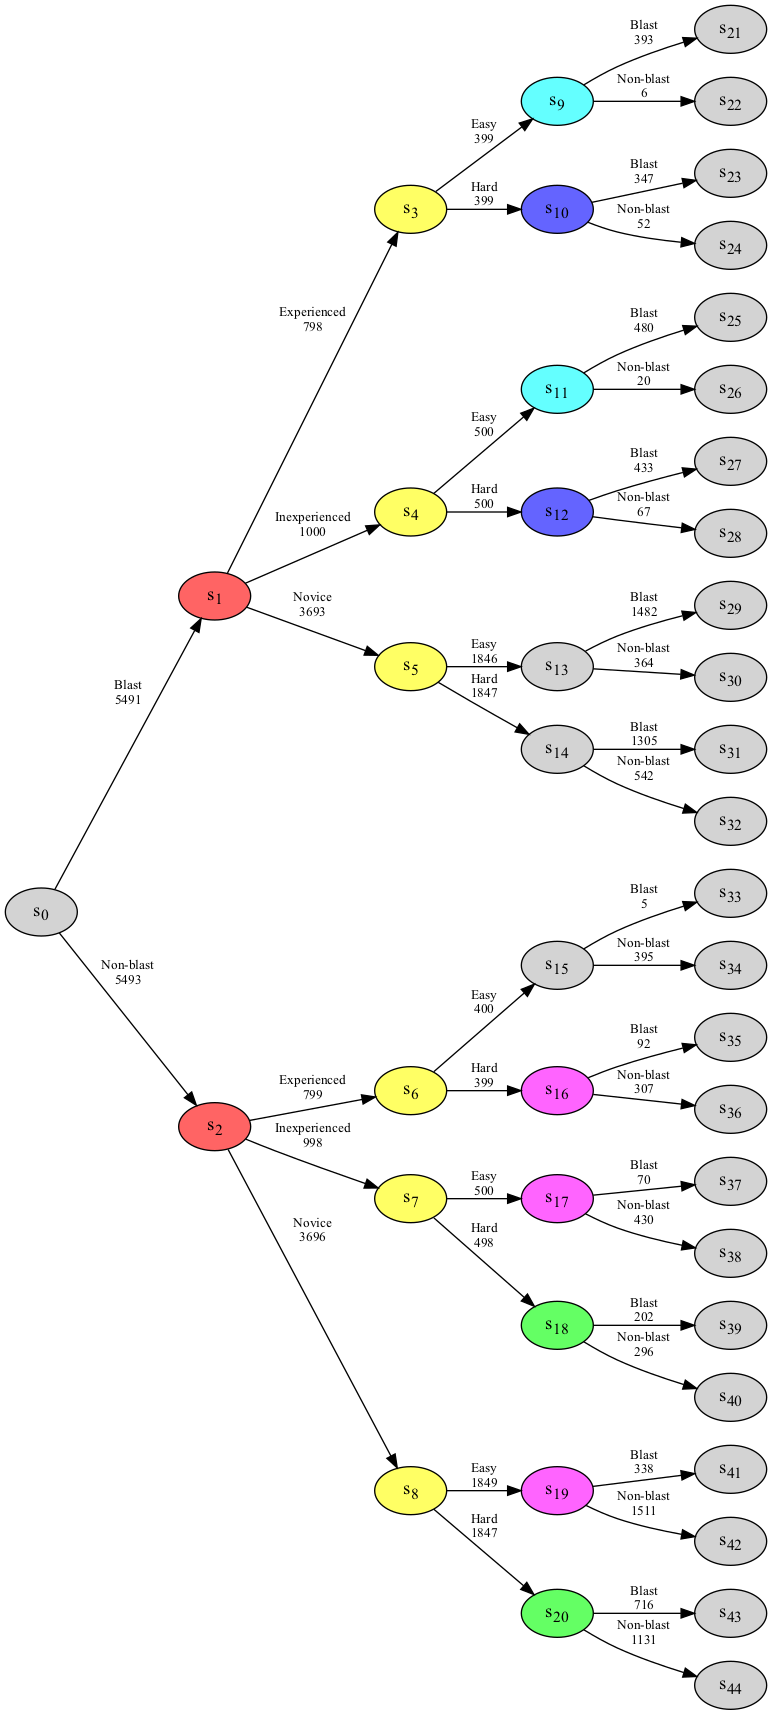

In [12]:
staged_tree.create_figure()

<h3>Step 3: Creation of the Chain Event Graph</h3>

Once we have run the AHC algorithm to identify the stages, we can create the CEG by passing the `StagedTree` object into the `ChainEventGraph` class. It can be displayed using the `.create_figure()` method as shown below.

_Note: Nodes in the same stage are compared to determine if it is possible to join them together or not. Some are simply not logically compatible with each other. For details, see the documentation._


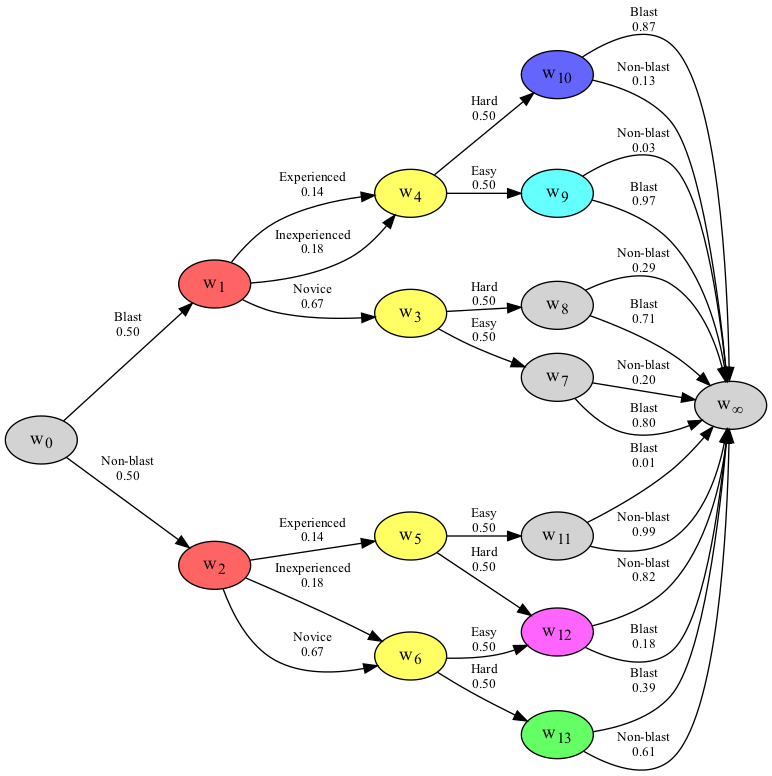

In [13]:
chain_event_graph = ChainEventGraph(staged_tree)
chain_event_graph.create_figure()

<h3>Further reading</h3>

For more examples, check out the other binders in this repository. For more information, see the documentation.